In [1]:
import pandas as pd

In [2]:
rossman_df = pd.read_csv("F:/JupyterML/ML_Practice/datasets/hypothesis/train.csv")

F:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
rossman_df.shape

(1017209, 9)

In [11]:
rossman_df.head(5)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [12]:
rossman_df.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


In [18]:
rossman_df = rossman_df[rossman_df.Sales > 0]

In [19]:
rossman_df.head(5)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


# Understanding the impact of promos and upcoming holidays on sales

# Does average sales during promos days are higher than sales during non-promo days?


In [20]:
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib

Using matplotlib backend: Qt5Agg


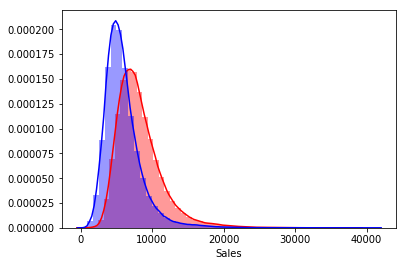

In [23]:
sn.distplot(rossman_df[rossman_df.Promo ==1].Sales,color ='r')
sn.distplot(rossman_df[rossman_df.Promo ==0].Sales,color ='b')

In [25]:
##Average sales on promo and non promo days
avg_sales_promo = rossman_df[rossman_df.Promo ==1].Sales.mean()
avg_sales_non_promo = rossman_df[rossman_df.Promo ==0].Sales.mean()
print("average sales in promo days",round(avg_sales_promo,2))
print("average sales in non promo days",round(avg_sales_non_promo,2))

average sales in promo days 8228.74
average sales in non promo days 5929.83


# Sales during promo days are higher?

In [26]:
from scipy import stats

In [27]:
stats.ttest_ind( rossman_df[rossman_df.Promo == 1].Sales,
              rossman_df[rossman_df.Promo == 0].Sales )

Ttest_indResult(statistic=363.8948133353385, pvalue=0.0)

In [28]:
stores_df = pd.read_csv("F:/JupyterML/ML_Practice/datasets/hypothesis/store.csv")

In [29]:
stores_df.head(5)

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [31]:
ross_new_df = rossman_df.merge(stores_df ,on = ['Store'] ,how ='inner')

In [32]:
ross_new_df.head(4)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,1,4,2015-07-30,5020,546,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
2,1,3,2015-07-29,4782,523,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
3,1,2,2015-07-28,5011,560,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN


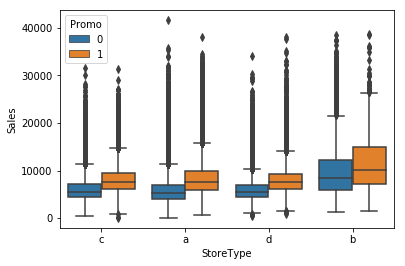

In [33]:
sn.boxplot(x = 'StoreType' , y = 'Sales',hue = 'Promo',data = ross_new_df)

In [36]:
def isSalesHighPromo(storeType):
    store_type_sales = ross_new_df [ross_new_df.StoreType == storeType]
    return stats.ttest_ind(store_type_sales[store_type_sales.Promo == 1].Sales , store_type_sales[store_type_sales.Promo == 0].Sales)

In [37]:
isSalesHighPromo('a')

Ttest_indResult(statistic=276.54664703848425, pvalue=0.0)

In [39]:
isSalesHighPromo('b')

Ttest_indResult(statistic=20.778835096313788, pvalue=1.2915804424519336e-94)

In [40]:
isSalesHighPromo('c')

Ttest_indResult(statistic=123.88357113852456, pvalue=0.0)

In [41]:
isSalesHighPromo('d')

Ttest_indResult(statistic=235.83789503346077, pvalue=0.0)

As p-values are less than 0.05, sales are higher during promos across all store types

# Are the sales higher when holiday next day?

In [48]:
ross_new_df[['SchoolHoliday','StateHoliday']].head(8)

,SchoolHoliday,StateHoliday
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
5,0,0
6,0,0
7,0,0


In [50]:
ross_new_df['next_day_SchoolHoliday'] = ross_new_df.groupby(['Store'])['SchoolHoliday'].shift( -1 )

In [53]:
ross_new_df[['Store', 'SchoolHoliday', 'next_day_SchoolHoliday','StateHoliday']].head( 8 )

,Store,SchoolHoliday,next_day_SchoolHoliday,StateHoliday
0,1,1,1.0,0
1,1,1,1.0,0
2,1,1,1.0,0
3,1,1,1.0,0
4,1,1,0.0,0
5,1,0,0.0,0
6,1,0,0.0,0
7,1,0,0.0,0


In [54]:
next_day_holiday = ross_new_df[(ross_new_df.next_day_SchoolHoliday ==1) & (ross_new_df.SchoolHoliday ==0)]
next_day_no_holiday = ross_new_df[(ross_new_df.next_day_SchoolHoliday ==0) & (ross_new_df.SchoolHoliday ==1)]

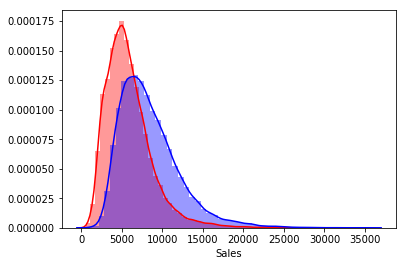

In [55]:
sn.distplot(next_day_holiday.Sales,color = 'r')
sn.distplot(next_day_no_holiday.Sales,color = 'b')

In [56]:

stats.ttest_ind( next_day_holiday.Sales,
              next_day_no_holiday.Sales )

Ttest_indResult(statistic=-104.68503777865911, pvalue=0.0)

Surprisingly the sales are lower if the next day is a holiday

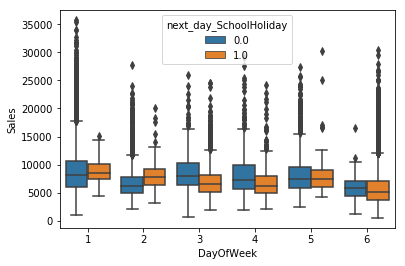

In [58]:
sn.boxplot( x = 'DayOfWeek',y='Sales',hue = 'next_day_SchoolHoliday',data = pd.concat( [next_day_holiday, next_day_no_holiday] ))

# Impact of weekday on sales if the next day is a holiday

In [59]:
def isSalesHigherForNextDayHoliday( dayOfWeek ):
  next_day_holiday_sales = next_day_holiday[next_day_holiday.DayOfWeek == dayOfWeek].Sales
  next_day_no_holiday_sales = next_day_no_holiday[next_day_no_holiday.DayOfWeek == dayOfWeek].Sales

  return stats.ttest_ind( next_day_holiday_sales, next_day_no_holiday_sales, equal_var = False )

In [60]:
for day in range( 1, 8 ):
  t_stat, p_val = isSalesHigherForNextDayHoliday( day )
  print( "For Day :",
        day ,
        "t-stats: ",
        round( t_stat, 3 ),
        "  p_vals: ",
        round( p_val, 3 ) )

For Day : 1 t-stats:  0.349   p_vals:  0.729
For Day : 2 t-stats:  6.235   p_vals:  0.0
For Day : 3 t-stats:  -11.428   p_vals:  0.0
For Day : 4 t-stats:  -7.802   p_vals:  0.0
For Day : 5 t-stats:  0.372   p_vals:  0.711
For Day : 6 t-stats:  -0.869   p_vals:  0.387
For Day : 7 t-stats:  nan   p_vals:  nan


# Manually create multiple samples and compare the sampling distributions

In [61]:
import numpy as np

In [62]:
def samplingMeansForDaysOfWeek( dayOfWeek ):
  next_day_holiday_sales = next_day_holiday[next_day_holiday.DayOfWeek == dayOfWeek].Sales

  holiday_sampling_mean = []

  for a in range( 1, 50 ):
      holiday_sampling_mean.append( next_day_holiday_sales.sample( frac = 0.1 ).mean() )

  next_day_no_holiday_sales = next_day_no_holiday[next_day_no_holiday.DayOfWeek == dayOfWeek].Sales

  no_holiday_sampling_mean = []

  for a in range( 1, 50 ):
      no_holiday_sampling_mean.append( next_day_no_holiday_sales.sample( frac = 0.1 ).mean() )

  sn.set(rc={"figure.figsize": (6, 4)});

  sn.distplot( holiday_sampling_mean, color = 'g' )
  plt.axvline(np.mean( holiday_sampling_mean ), color='g', linestyle='dashed', linewidth=2)
  sn.distplot( no_holiday_sampling_mean, color= 'r' )
  plt.axvline(np.mean( no_holiday_sampling_mean ), color='r', linestyle='dashed', linewidth=2)
  plt.show()

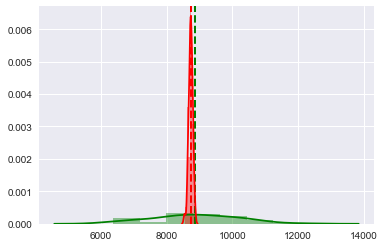

In [63]:
samplingMeansForDaysOfWeek( 1 )

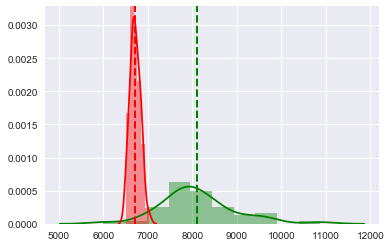

In [64]:
samplingMeansForDaysOfWeek( 2 )

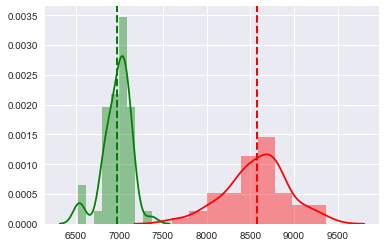

In [65]:
samplingMeansForDaysOfWeek( 3 )

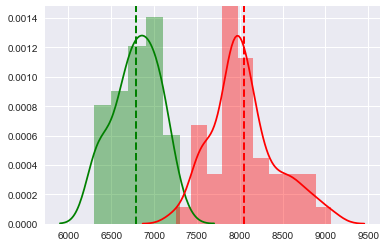

In [66]:
samplingMeansForDaysOfWeek( 4 )

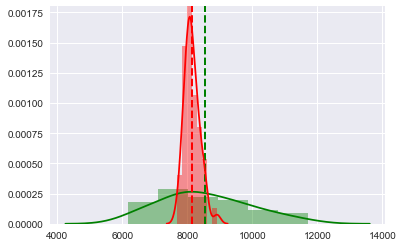

In [67]:
samplingMeansForDaysOfWeek( 5 )

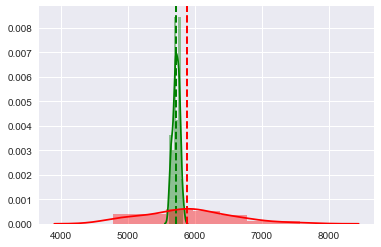

In [68]:
samplingMeansForDaysOfWeek( 6 )